In [136]:
import numpy as np 
import pandas as pd 

In [137]:
train = pd.read_csv('/Users/senlinlidewo/金融风控比赛/用户逾期/train.csv')
test = pd.read_csv('/Users/senlinlidewo/金融风控比赛/用户逾期/test.csv')

/Users/senlinlidewo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [38]:
train.columns[1:10] 
#列名

Index(['OPEN_ORG_NUM', 'IDF_TYP_CD', 'GENDER', 'bad_good',
       'LAST_OPEN_TENURE_DAYS', 'G_OS_PRCP_SUM', 'OS_PRCP_SUM_THREE',
       'OS_PRCP_SUM_SIX', 'guozhai_flag'],
      dtype='object')

In [52]:
train[['GENDER','bad_good']].groupby(['GENDER'], as_index=False).mean()
##groupby内容
train.groupby('GENDER')['bad_good'].mean().sort_values()

GENDER
2    0.008387
1    0.011228
2    0.032364
1    0.040460
X    0.064690
Name: bad_good, dtype: float64

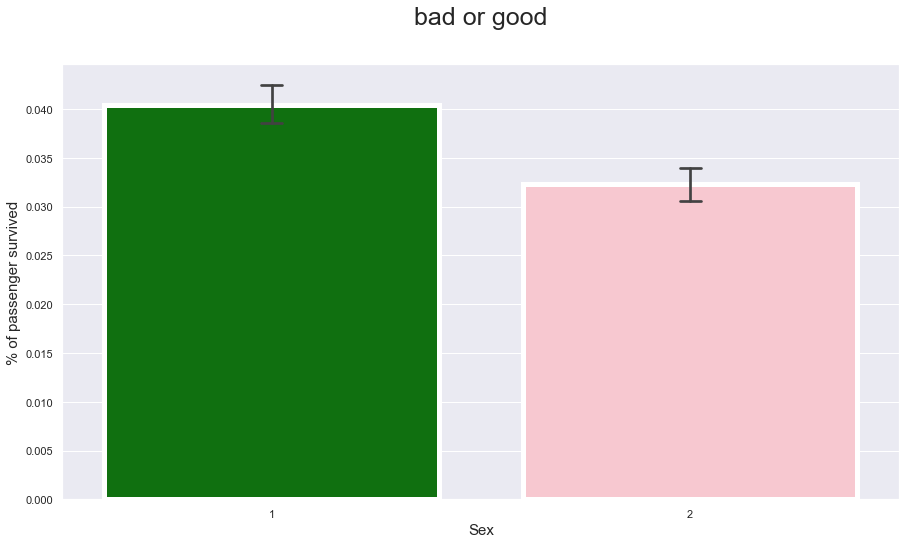

In [57]:
#相关性描述作图
import seaborn as sns
import matplotlib.pyplot as plt
pal = {'1':"green", '2':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.barplot(x = "GENDER", 
                 y = "bad_good", 
                 data=train, 
                 palette = pal,
                 linewidth=5,
                 order = ['1','2'],
                 capsize = .05,

                )

plt.title("bad or good", fontsize = 25,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 15, )
plt.xlabel("Sex",fontsize = 15);

In [138]:
#相关性描述
train=train.iloc[:,1:50]
pd.DataFrame(abs(train.corr()['bad_good']).sort_values(ascending = False))

,bad_good
bad_good,1.000000
CUST_PRODUCT_CNT,0.046564
OPEN_ORG_NUM,0.041020
CUST_ACCOUNT_CNT,0.026671
CUST_ACCOUNT_OPEN_CNT,0.026352
LAST_OPEN_TENURE_DAYS,0.024913
CUST_ACCOUNT_LOST_CNT,0.023001
CUST_DEBT_AMT,0.011951
CUST_PRIFINA_AMT,0.010010
G_OS_PRCP_SUM,0.009884


In [73]:
corr = train.corr()**2
corr.bad_good.sort_values(ascending=False)
#平方相关性


bad_good                 1.000000
LAST_OPEN_TENURE_DAYS    0.000621
G_OS_PRCP_SUM            0.000098
OS_PRCP_SUM_THREE        0.000022
OS_PRCP_SUM_SIX          0.000022
guozhai_flag             0.000003
Name: bad_good, dtype: float64

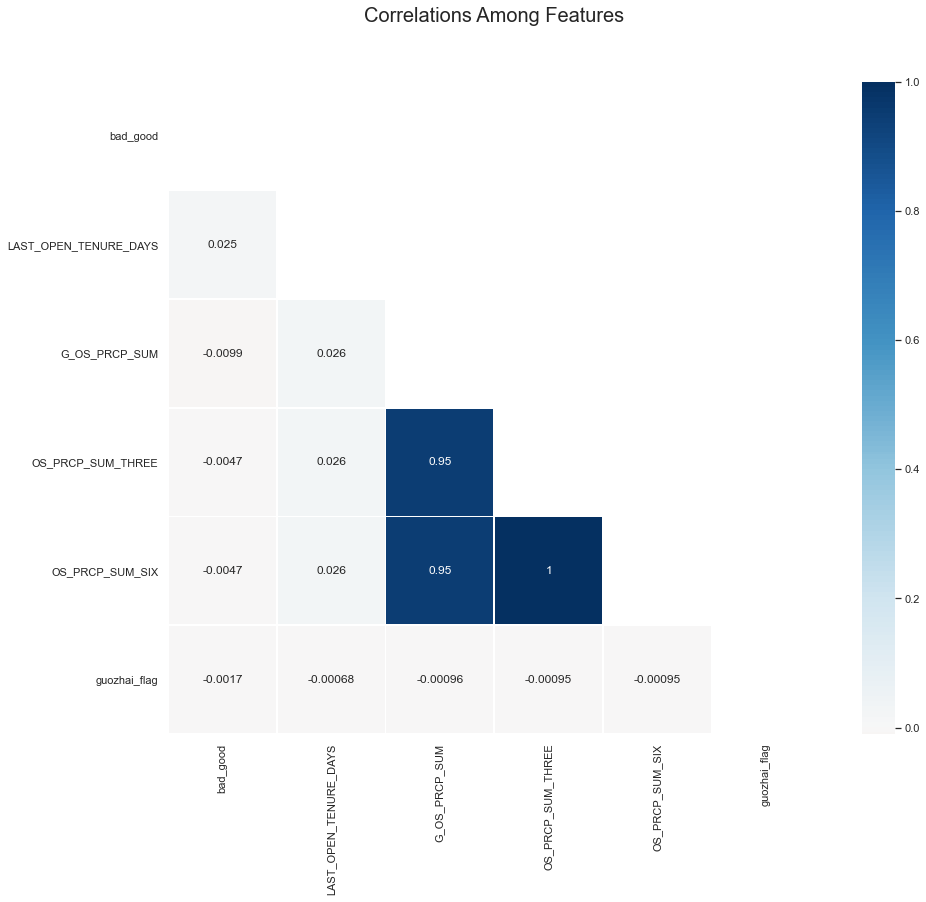

In [74]:
## heatmeap to see the correlation between features. 
# Generate a mask for the upper triangle (taken from seaborn example gallery)
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='white',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

In [142]:
# 文字类列处理
print(train.IDF_TYP_CD.unique())
train.IDF_TYP_CD = train.IDF_TYP_CD.apply(lambda x:x.strip())
train['IDF_TYP_CD'] = [i.replace('ZR','') for i in train.IDF_TYP_CD]
#去除某列特定字符。

['01' '20' '03' '09' '22' '21' '04' '07' '11' '16' '06' '05' '08' '02'
 '13' '14' '10' '12']


In [146]:
col = list(train.columns)
train[col] = train[col].apply(pd.to_numeric,errors='coerce').fillna(0.0)
train = pd.DataFrame(train,dtype='float')
#把数据转换为float格式，才能scaling

In [97]:
# 数据准备:separating dependent and independent variables 
#有两种方式实现这一目标：train_test_split和cross_validation
X_train = train.drop(["bad_good"],axis=1)
Y_train = train.loc[:,["bad_good"]]
X_test  = test

In [182]:
#第二种方法cross_validation
train_data = train.drop(columns=["bad_good"])
train_data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data,train["bad_good"],test_size = 0.33,random_state=0)
len(X_train)
#train_data是待划分自变量集；train['bad_good']是在定义Y；这个步骤仅针对train集，从中划分出验证集

191140

In [187]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(191140, 48)
(94145, 48)
(191140,)


In [189]:
#If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
#MinMaxScaler-Scales the data using the max and min values so that it fits between 0 and 1.
#StandardScaler-Scales the data so that it has mean 0 and variance of 1.
#RobustScaler-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.
#Feature Scaling
##We will be using standardscaler to transform
header = X_train.columns  ##为后续列表添加列名

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.transform(X_test)
X_train = pd.DataFrame(X_train,columns=header)
X_train.head()

,OPEN_ORG_NUM,IDF_TYP_CD,GENDER,LAST_OPEN_TENURE_DAYS,G_OS_PRCP_SUM,OS_PRCP_SUM_THREE,OS_PRCP_SUM_SIX,guozhai_flag,L3_DR_AMT,L3_DR_CNT,...,CUST_LUXURY_PLATINUM_FLAG,CUST_PLATINUM_FINANCIAL_FLAG,CUST_DIAMOND_FLAG,CUST_INFINIT_FLAG,CUST_BUSINESS_FLAG,CUST_ASSET_AMT,CUST_DEBT_AMT,CUST_TENURE_MONTHS,CUST_ACCOUNT_OPEN_CNT,CUST_ACCOUNT_LOST_CNT
0,-0.827020,-0.102591,1.034829,-0.334735,-0.076445,-0.075587,-0.075587,-0.01294,-0.105833,-0.147627,...,0.0,0.0,0.0,0.0,0.0,-0.124165,-0.164806,0.0,-0.327430,-0.2517
1,1.172228,-0.102591,-0.937129,-0.334735,-0.076445,-0.075587,-0.075587,-0.01294,-0.097535,-0.098705,...,0.0,0.0,0.0,0.0,0.0,-0.136174,-0.164806,0.0,-0.327430,-0.2517
2,0.259429,-0.102591,1.034829,-0.334735,-0.076445,-0.075587,-0.075587,-0.01294,-0.105833,-0.147627,...,0.0,0.0,0.0,0.0,0.0,-0.137566,-0.164806,0.0,-0.258496,-0.2517
3,3.399961,-0.102591,-0.937129,-0.334735,-0.076445,-0.075587,-0.075587,-0.01294,-0.105833,-0.147627,...,0.0,0.0,0.0,0.0,0.0,0.798128,-0.164806,0.0,-0.258496,-0.2517
4,-0.712777,-0.102591,1.034829,-0.334735,-0.076445,-0.075587,-0.075587,-0.01294,-0.105833,-0.147627,...,0.0,0.0,0.0,0.0,0.0,-0.139038,-0.164806,0.0,-0.327430,-0.2517


In [191]:
#其他交叉验证集划分方法：https://blog.csdn.net/u010986753/article/details/98069124

In [ ]:
#相关性热力图

In [ ]:
corr_train =  train_data.corr()
sns.heatmap(corr_train)
plt.show()

In [ ]:
##定义各种类型的变量
cat_cols = [
     'Cabin','Embarked','Name','Sex','Ticket',
]

num_cols = list(set(train.columns) - set(cat_cols) - set(["Survived"]))